<a href="https://colab.research.google.com/github/tnleang/machineLearning/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt


# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)



# based function to perform the tasks below
# MSE using numpy
def mean_square_err(test_target,predict_target):
  return np.square(np.subtract(test_target, predict_target)).sum() /(2 * len(test_target))

# compute loss
def lossFunction(X,y):
  return mean_square_err(X,y)

<h4>Use scikit-learn library in the following cell</h4>

In [3]:
# Task 1-1: use linear regression in sklearn
regr = linear_model.LinearRegression()
regr.fit(train_data,train_target)
predict_ptarget = regr.predict(test_data)
train_predict = regr.predict(train_data)

#print(test_target)
#print(predict_ptarget)
# Task 1-2: show intercept and coefficents
print('Intercept: \n', regr.intercept_ )
print('Coefficients: \n', regr.coef_)

# Task 1-3: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_ptarget)) 

Intercept: 
 [30.24675099]
Coefficients: 
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Mean squared error train data: 10.82
Mean squared error test data: 12.15


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [76]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
  return (linalg.inv((X.T @ X)) @ X.T) @ y

    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X @ w

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)
predict_target = myPredictFun(test_data_intercept, w)
train_predict = myPredictFun(train_data_intercept, w)


# Task 2-3: show intercept and coefficents
print('Intercept: \n', w[0] )
print('Coefficents: \n',w[1:])


# Task 2-4: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_target)) 

Intercept: 
 [22.79653465]
Coefficents: 
 [[-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]
Mean squared error train data: 10.82
Mean squared error test data: 12.15


<h4>Use numerical solution (basic gradient descent) to perform linear regression in the following cell</h4>

Intercept: 
 [22.79653465]
Coefficents: 
 [[-1.0009387 ]
 [ 0.69344751]
 [ 0.2726685 ]
 [ 0.71958042]
 [-2.02172298]
 [ 3.14654623]
 [-0.17653382]
 [-3.08121565]
 [ 2.23516414]
 [-1.74888601]
 [-2.03726629]
 [ 1.12947043]
 [-3.61086527]]
Mean squared error train data: 10.82
Mean squared error test data: 12.15


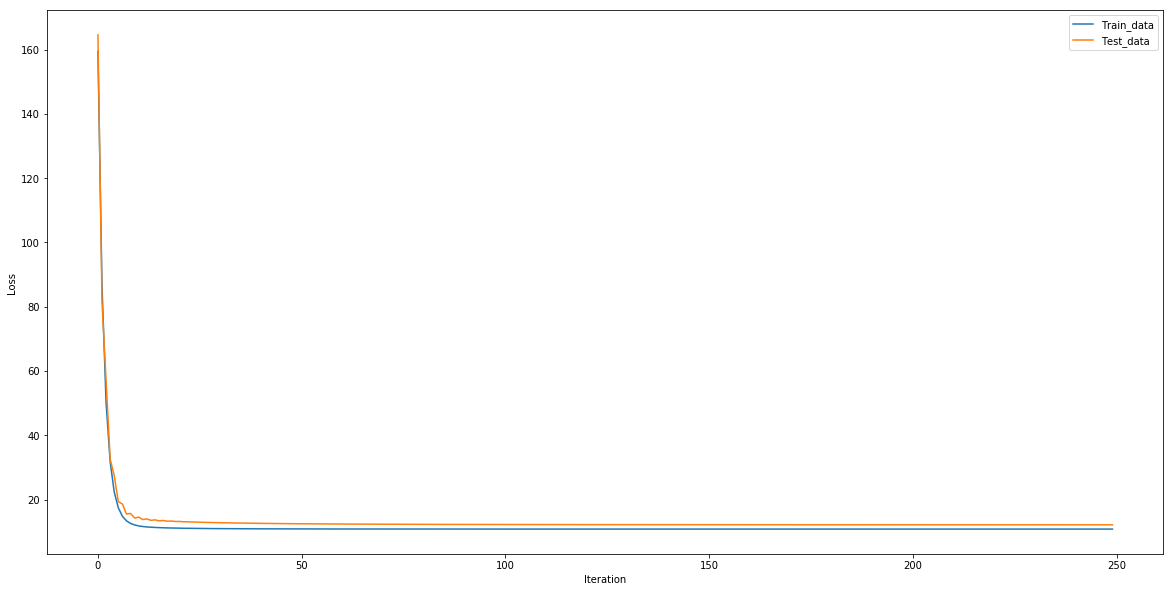

In [90]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations, Testing data, testing label
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs,test_X, test_y):
    
    n_size = len(y)
    w = np.random.rand(np.size(X,1),1)
    history = []
    history_test = []
    
    for i in range(numItrs):
      # compute gradient and update weights
      gradient = -(1 / n_size) * ((X.T @ (y - (X @ w)))) 
      w = w - learning_rate * gradient 
      
      # compute the loss with train data and test data
      y_predict = myPredictFun(X,w)  
      y_validate = myPredictFun(test_X,w) 
      loss = lossFunction(y, y_predict)
      loss_validate = lossFunction(test_y, y_validate)
      
      # store the loss history
      history.append(loss)
      history_test.append(loss_validate)
      
    return w,history, history_test

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X @ w

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w,history, history_test = myGradientDescentFun(train_data_intercept,train_target,0.3,250, test_data_intercept, test_target)

predict_target = myPredictFun(test_data_intercept, w)
train_predict = myPredictFun(train_data_intercept, w)


# Task 3-3: show intercept and coefficents
print('Intercept: \n', w[0] )
print('Coefficents: \n',w[1:])


# Task 3-4: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_target)) 


# Task 3-5: plot learning curves showing training errors and testing errors along iterations
# Get training and test loss histories
fig = plt.figure(figsize=[20,10])
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.plot(history, label='Train_data')
plt.plot(history_test, label='Test_data')
plt.legend()
plt.show()



<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

Intercept: 
 [22.78524252]
Coefficents: 
 [[-1.00434044]
 [ 0.6918346 ]
 [ 0.26008253]
 [ 0.76623403]
 [-2.02058457]
 [ 3.11490897]
 [-0.19467501]
 [-3.10394278]
 [ 2.16799519]
 [-1.56669975]
 [-2.01336812]
 [ 1.11975627]
 [-3.62272913]]
Mean squared error train data: 10.83
Mean squared error test data: 12.10


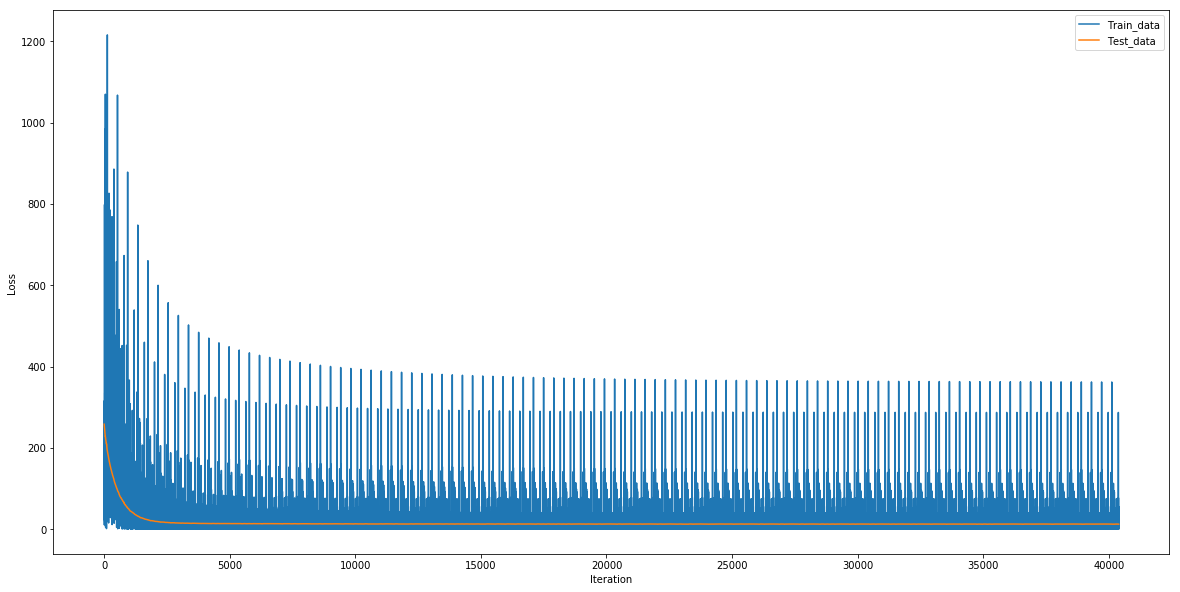

In [87]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# perform batch
# cutting the array of data set into batches
def batch_gradient(X,y,batchsize):
  for i in range(0,X.shape[0],batchsize):
    yield (X[i:i+batchsize], y[i:i+batchsize])


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, learning rate, number of epoches, batch size, Testing data, testing label
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize,test_X, test_y):

    # initialize
    w = np.random.rand(np.size(X,1),1) # weights
    history = []   # train loss history
    history_test = [] # test loss history
    
    for i in range(epoches):
      for batch in batch_gradient(X,y,batchsize):
        # perform LR on each batch
        # compute gradient and update weights
        gradient = -(1 / len(batch[0]) * ((batch[0].T @ (batch[1] - (batch[0] @ w)))))
        w = w - learning_rate * gradient
        
        # compute the loss with train data and test data
        y_predict = myPredictFun(batch[0],w)
        y_validate = myPredictFun(test_X,w)
        loss = mean_square_err(batch[1], y_predict)
        loss_validate = mean_square_err(test_y, y_validate)
        
        # store the loss history
        history.append(loss)
        history_test.append(loss_validate)
    
    return w, history, history_test

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return X @ w

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w,history, history_test = myGradientDescentFun(train_data_intercept,train_target,0.001,100,1, test_data_intercept, test_target)
predict_target = myPredictFun(test_data_intercept, w)
train_predict = myPredictFun(train_data_intercept, w)


# Task 4-3: show intercept and coefficents
print('Intercept: \n', w[0] )
print('Coefficents: \n',w[1:])


# Task 4-4: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_target)) 


# Task 4-5: plot learning curves showing training errors and testing errors along bath
fig = plt.figure(figsize=[20,10])
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.plot(history, label='Train_data')
plt.plot(history_test, label='Test_data')
plt.legend()
plt.show()